In [17]:
!pip install pandas scikit-learn nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import time

nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)

True

In [19]:
file_path = 'News_Category_Dataset_v3.json'
df2 = pd.read_json(file_path, lines=True)
df2['text'] = df2['headline'] + " " + df2['short_description']
df2 = df2[['category', 'text']]

In [20]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df2['processed_text'] = df2['text'].apply(preprocess_text)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['category'], test_size=0.6)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB()),
])

In [22]:
print("Training the model...")
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training completed in {training_time:.2f} seconds ({training_time/60:.2f} minutes)")

print("Making predictions...")
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

Training the model...
Training completed in 5.35 seconds (0.09 minutes)
Making predictions...
Accuracy: 0.4922

Classification Report:
                precision    recall  f1-score   support

          ARTS       0.50      0.01      0.01       942
ARTS & CULTURE       1.00      0.00      0.00       822
  BLACK VOICES       0.66      0.07      0.13      2781
      BUSINESS       0.49      0.24      0.32      3584
       COLLEGE       0.50      0.00      0.00       705
        COMEDY       0.68      0.20      0.31      3270
         CRIME       0.52      0.44      0.48      2096
CULTURE & ARTS       0.50      0.01      0.01       624
       DIVORCE       0.87      0.40      0.55      2070
     EDUCATION       1.00      0.00      0.01       608
 ENTERTAINMENT       0.44      0.76      0.55     10426
   ENVIRONMENT       0.97      0.04      0.08       868
         FIFTY       1.00      0.00      0.00       805
  FOOD & DRINK       0.58      0.66      0.62      3822
     GOOD NEWS       0.2

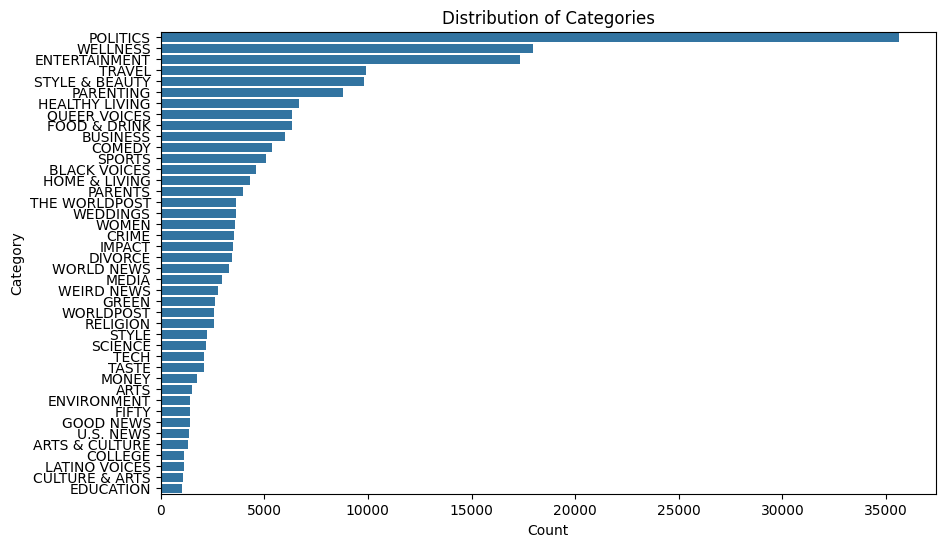

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df2, order=df2['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()